In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [27]:
spotify_2024 = pd.read_csv("./data/Most Streamed Spotify Songs 2024.csv", encoding='latin1')

In [28]:
spotify_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

I can see that all number columns are objects, not floats or integers. In order to have right approach, they need to be converted into integers. Ive also see that 'TIDAL Popularity' column have all values as null.

In [29]:
spotify_2024.shape

(4600, 29)

In [30]:
spotify_2024.isnull().sum().sort_values(ascending=False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
All Time Rank                    0
Track Score                      0
ISRC                             0
Track                            0
Album Name                       0
Release Date                     0
Explicit Track      

In [31]:
spotify_2024.columns.to_list()

['Track',
 'Album Name',
 'Artist',
 'Release Date',
 'ISRC',
 'All Time Rank',
 'Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'SiriusXM Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Pandora Track Stations',
 'Soundcloud Streams',
 'Shazam Counts',
 'TIDAL Popularity',
 'Explicit Track']

In [32]:
#dates are in US format
spotify_2024['Release Date'].unique()

array(['4/26/2024', '5/4/2024', '3/19/2024', ..., '10/31/2018',
       '11/8/2016', '4/11/2017'], dtype=object)

In [33]:

# Convert the 'Date' column to datetime format (American MM/DD/YYYY)
spotify_2024['Release Date'] = pd.to_datetime(spotify_2024['Release Date'], format='%m/%d/%Y')

# Convert to European format (DD/MM/YYYY)
spotify_2024['Release Date'] = spotify_2024['Release Date'].dt.strftime('%d/%m/%Y')

# Display the result
print(spotify_2024)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date          ISRC All Time Rank  Track Score  \
0      Tommy Richman 

In [34]:
spotify_2024 = spotify_2024.drop_duplicates()
spotify_2024.shape

(4598, 29)

In [35]:
nan_count_per_column = spotify_2024.isna().sum()
print(nan_count_per_column)

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popularity              4598
Explicit Track      

In [36]:
# Check NaN values in each column.
for column in spotify_2024.columns:
    print(column, spotify_2024[column].isnull().sum())

Track 0
Album Name 0
Artist 5
Release Date 0
ISRC 0
All Time Rank 0
Track Score 0
Spotify Streams 113
Spotify Playlist Count 70
Spotify Playlist Reach 72
Spotify Popularity 804
YouTube Views 308
YouTube Likes 315
TikTok Posts 1173
TikTok Likes 980
TikTok Views 981
YouTube Playlist Reach 1009
Apple Music Playlist Count 561
AirPlay Spins 498
SiriusXM Spins 2123
Deezer Playlist Count 921
Deezer Playlist Reach 928
Amazon Playlist Count 1055
Pandora Streams 1106
Pandora Track Stations 1268
Soundcloud Streams 3332
Shazam Counts 577
TIDAL Popularity 4598
Explicit Track 0


In [37]:
# Drop a row if ALL columns in a row are NaN
spotify_2024.dropna(how="all")

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,26/04/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,04/05/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,19/03/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,12/01/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,31/05/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,05/09/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,27/07/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,28/02/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,08/11/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [38]:
spotify_2024.drop_duplicates()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,26/04/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,04/05/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,19/03/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,12/01/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,31/05/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,05/09/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,27/07/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,28/02/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,08/11/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [39]:
for column in spotify_2024.columns:
    print(column, spotify_2024[column].isnull().sum())

Track 0
Album Name 0
Artist 5
Release Date 0
ISRC 0
All Time Rank 0
Track Score 0
Spotify Streams 113
Spotify Playlist Count 70
Spotify Playlist Reach 72
Spotify Popularity 804
YouTube Views 308
YouTube Likes 315
TikTok Posts 1173
TikTok Likes 980
TikTok Views 981
YouTube Playlist Reach 1009
Apple Music Playlist Count 561
AirPlay Spins 498
SiriusXM Spins 2123
Deezer Playlist Count 921
Deezer Playlist Reach 928
Amazon Playlist Count 1055
Pandora Streams 1106
Pandora Track Stations 1268
Soundcloud Streams 3332
Shazam Counts 577
TIDAL Popularity 4598
Explicit Track 0


In [40]:
data_cleaned = spotify_2024.dropna(subset=['Artist'])

In [41]:
data_cleaned = data_cleaned.dropna(subset=['Spotify Streams'])

In [42]:
data_cleaned = data_cleaned.dropna(subset=['YouTube Likes'])

In [43]:
data_cleaned = data_cleaned.dropna(subset=['TikTok Likes'])

In [44]:

data_cleaned.reset_index(drop=True, inplace = True)

In [45]:
data_cleaned.shape

(3514, 29)

In [46]:
data_cleaned['Spotify Streams'] = data_cleaned['Spotify Streams'].str.replace(',','').astype(float)

In [47]:
data_cleaned['All Time Rank'] = data_cleaned['All Time Rank'].str.replace(',','').astype(float)

In [48]:
data_cleaned['YouTube Likes'] = data_cleaned['YouTube Likes'].str.replace(',','').astype(float)

In [49]:
data_cleaned['TikTok Likes'] = data_cleaned['TikTok Likes'].str.replace(',','').astype(float)

In [51]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       3514 non-null   object 
 1   Album Name                  3514 non-null   object 
 2   Artist                      3514 non-null   object 
 3   Release Date                3514 non-null   object 
 4   ISRC                        3514 non-null   object 
 5   All Time Rank               3514 non-null   float64
 6   Track Score                 3514 non-null   float64
 7   Spotify Streams             3514 non-null   float64
 8   Spotify Playlist Count      3514 non-null   object 
 9   Spotify Playlist Reach      3514 non-null   object 
 10  Spotify Popularity          3245 non-null   float64
 11  YouTube Views               3514 non-null   object 
 12  YouTube Likes               3514 non-null   float64
 13  TikTok Posts                3306 

In [52]:
#1. To check if data was correctly cleaned:
#check head and tails to make sure that the data is correct
#sample method-> check random samples of the dataset to check if there are problems:
#methods:
#data.sample(n=XXX) --> n can be equal to the size you want
#data.sample(frac=0.1) --> fraction of original data frame
#run it 5 times to check that your data is correctly cleaned

data_cleaned.sample(n=10)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
993,Kya Loge Tum,Kya Loge Tum,B Praak,15/05/2023,INUM72300286,1238.0,42.6,8.970164e+07,"2,561","1,939,449",...,NaN,NaN,NaN,5.0,720,NaN,NaN,"104,287",NaN,0
3192,Chillax,Visionary,Farruko,23/10/2015,USSD11500378,4148.0,20.8,3.662681e+08,"40,643","11,704,627",...,28,20.0,"180,869",12.0,"115,556,623","30,706",NaN,"2,925,079",NaN,0
443,Unstoppable,Unstoppable,Sia,21/01/2016,USRC11502934,548.0,65.5,1.285238e+09,"166,761","75,244,498",...,549,86.0,"1,468,966",52.0,"92,645,908","86,880",NaN,"15,422,384",NaN,0
1224,Shut Up and Dance,Full Circle: The Live Anthology,WALK THE MOON,20/11/2011,USRC11401949,1530.0,37.6,1.690450e+09,"225,204","121,786,733",...,806,113.0,"505,069",66.0,"537,982,216","824,867",NaN,"11,303,352",NaN,0
3430,Bounce Back,Bounce Back,Big Sean,31/10/2016,USUM71614503,4465.0,19.7,7.113227e+08,"98,581","22,063,307",...,122,24.0,"92,788",17.0,"378,582,160","192,137",NaN,"3,184,032",NaN,1
3073,MONEY AND VIBES,MONEY AND VIBES,Nemzzz,19/10/2023,US38Y2305407,3985.0,21.4,3.590010e+07,"17,596","1,306,168",...,NaN,2.0,"55,922",3.0,NaN,NaN,"1,877,628","93,958",NaN,1
1409,El Efecto,El Efecto,Rauw Alejandro,15/03/2019,QM4TX1940916,1766.0,34.7,5.800542e+08,"72,991","32,213,511",...,20,11.0,"252,415",22.0,"23,201,439","5,578",NaN,"2,734,291",NaN,0
1606,Me Atraiu - Ao Vivo,Me Atraiu (Ao Vivo),Gabriela Rocha,01/02/2023,BR4WM2300002,2027.0,32.0,1.031321e+08,"16,094","9,626,456",...,NaN,58.0,"6,984,451",5.0,"22,643",NaN,NaN,"118,786",NaN,0
1883,Dirt Cheap,Leather,Cody Johnson,03/11/2023,QMCQK1900317,2387.0,29.2,4.404784e+07,"8,961","11,610,924",...,4,1.0,"1,149",35.0,"15,957,709","8,376","620,808","252,283",NaN,0
2477,Car Keys (Ayla),Car Keys (Ayla),Alok,30/06/2023,DEE862300929,3176.0,24.5,1.075921e+08,"16,131","60,984,755",...,"1,298",65.0,"1,299,042",50.0,"941,625",258,NaN,"853,951",NaN,0


In [53]:
filtered_rows = data_cleaned[data_cleaned['Artist'].str.contains('½', na=False)]
print(filtered_rows)

                                   Track                          Album Name  \
86                                 Hands                               Hands   
102                        Casca de Bala           A Cara das Vaquejadas 3.0   
124                            DESPECHï¿                           DESPECHï¿   
190                         Si No Estï¿½               Si No Estï¿½ï¿½s - Si   
206              girls like me don't cry             Girls Like Me Don't Cry   
...                                  ...                                 ...   
3355                   Coraï¿½ï¿½ï¿½ï¿½o                        Patroas, EP1   
3413  Nobody Like U - From "Turning Red"  Nobody Like U (From "Turning Red")   
3414                          Hep Mi Ben                          Hep Mi Ben   
3486                 B.S. (feat. H.E.R.)                            Chilombo   
3513     Me Acostumbre (feat. Bad Bunny)     Me Acostumbre (feat. Bad Bunny)   

                                       

In [54]:
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('½', na = False)]
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('ý', na = False)]
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('ï¿', na = False)]

print(data_cleaned)

                                                  Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                           Lovin On Me   
...                                                 ...   
3508  ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...   
3509                                  For the Last Time   
3510                                   Dil Meri Na Sune   
3511                              Grace (feat. 42 Dugg)   
3512                                Nashe Si Chadh Gayi   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Ar

In [55]:
data_cleaned.sample(frac=0.1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
2512,Amigos Con Derechos,Amigos Con Derechos,Reik,31/08/2018,MXF011800409,3203.0,24.3,503187980.0,"36,629","13,318,890",...,74,27.0,"221,999",25.0,"57,708,356","12,061",NaN,"1,724,848",NaN,0
2621,The Thrill,The Thrill,Wiz Khalifa,11/11/2020,USA2P2033760,3350.0,23.7,362756358.0,"123,477","16,148,100",...,NaN,4.0,"1,227",7.0,"21,129,445","7,524",NaN,"579,324",NaN,1
3350,Como Si No Importara,Como Si No Importara,Emilia,13/07/2021,USSD12100347,4356.0,20.1,232985667.0,"43,893","6,507,466",...,120,8.0,"264,687",5.0,"75,232",NaN,NaN,"260,024",NaN,0
3260,Come Through (feat. Chris Brown),Come Through (feat. Chris Brown),H.E.R.,23/04/2021,USRC12100712,4238.0,20.5,172986367.0,"40,246","8,921,857",...,156,25.0,"89,707",36.0,"93,062,258","18,391",NaN,"1,353,202",NaN,1
2954,Hype Boy,NewJeans 1st EP 'New Jeans',NewJeans,01/08/2022,USA2P2230222,3836.0,21.8,541018402.0,"37,204","14,531,541",...,106,4.0,"10,871",10.0,"885,151","1,554","1,574,180","474,609",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,Privileged Rappers,Her Loss,Drake,04/11/2022,USUG12208602,3330.0,23.8,167840439.0,"54,445","11,034,203",...,118,NaN,NaN,NaN,"17,826,325","2,084",NaN,"420,954",NaN,1
1897,Hypnotized,Hypnotized,Purple Disco Machine,08/04/2020,AUDCB1701555,2419.0,29.0,354683755.0,"77,323","15,730,444",...,NaN,49.0,"1,245,110",24.0,"343,587",727,NaN,"8,349,963",NaN,0
1269,Goa Beach,Goa Beach,Tony Kakkar,11/02/2020,FR10S2014119,1576.0,36.9,33384757.0,"3,507","1,365,917",...,NaN,NaN,NaN,3.0,"2,276",NaN,NaN,"92,503",NaN,0
1447,"Shaitan Ka Saala (From ""Housefull 4"")","Shaitan Ka Saala (From ""Housefull 4"")",Sohail Sen,07/10/2019,INS181905023,1805.0,34.2,35269135.0,"3,782","1,470,547",...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,"167,685",NaN,0


2.Missing data:
delete if there is no artist, no matter if you have the name of the song. do not replace it manually
do not change special characters, leave it as it is
every change that is done manually, is not worth it.


3. How to know if the variables selected are correct, and not just make it look like a random selection:
you can use a correlation matrix with variables with numbers, be careful bc if numbers mean a categorical answer, then it is going to be a mess up
Use pearson correlation to spotify streams, youtube like, tiktok likes
Use pearson rank correlation and compare spotify streams with all time rank
all time rank vs youtube likes, and all time rank with tiktok likes (3 pearson rank correlations per separate)
this is only recommendedif the data has a normal distribution, in case not, it might fail.

In [56]:
data_cleaned.reset_index(drop=True, inplace = True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       3389 non-null   object 
 1   Album Name                  3389 non-null   object 
 2   Artist                      3389 non-null   object 
 3   Release Date                3389 non-null   object 
 4   ISRC                        3389 non-null   object 
 5   All Time Rank               3389 non-null   float64
 6   Track Score                 3389 non-null   float64
 7   Spotify Streams             3389 non-null   float64
 8   Spotify Playlist Count      3389 non-null   object 
 9   Spotify Playlist Reach      3389 non-null   object 
 10  Spotify Popularity          3133 non-null   float64
 11  YouTube Views               3389 non-null   object 
 12  YouTube Likes               3389 non-null   float64
 13  TikTok Posts                3186 

In [57]:
filtered_rows_2 = data_cleaned[data_cleaned['Track'].str.contains('½', na=False)]
print(filtered_rows_2)

                                                  Track  \
29    Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   
61                                   Titï¿½ï¿½ Me Pregu   
91                                  MI EX TENï¿½ï¿½A RA   
95                                           Acrï¿½ï¿½s   
118                                           Seï¿½ï¿½o   
...                                                 ...   
3252                                        Tï¿½ï¿½ï¿½n   
3302                        Cena Engraï¿½ï¿½ada e Inusi   
3307            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   
3320                                         DANï¿½ï¿½A   
3381                                     Dayanamï¿½ï¿½y   

                                             Album Name         Artist  \
29    Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   sped up 8282   
61                                     Un Verano Sin Ti      Bad Bunny   
91                MAï¿½ï¿½ANA SERï¿½ï¿½ BONITO (BICHOTA        KAROL 

In [58]:
data_cleaned.shape

(3389, 29)

In [59]:
# Group by Artist and calculate total Spotify Streams
artist_performance = data_cleaned.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Sort the artists by total Spotify Streams in descending order
top_10_artists = artist_performance.sort_values(by='Spotify Streams', ascending=False).head(10)

print(top_10_artists)

             Artist  Spotify Streams
134       Bad Bunny     3.599911e+10
1271     The Weeknd     3.332461e+10
362           Drake     3.238698e+10
1243   Taylor Swift     3.050357e+10
382      Ed Sheeran     2.401443e+10
1052    Post Malone     2.393399e+10
90    Ariana Grande     2.200021e+10
652   Justin Bieber     1.664780e+10
403          Eminem     1.652519e+10
165   Billie Eilish     1.632367e+10


In [60]:
#this fields ill keep for analysis
spotify_fields_keep = data_cleaned[['Album Name','Track','Artist',
                                    
                                      'All Time Rank','Track Score','Spotify Streams',
                                      'Spotify Popularity',
                                      'YouTube Views', 'YouTube Likes', 'TikTok Likes','TikTok Views',
                                    ]]  

In [61]:
# initial insight on top x albums 
top_x_artists = (spotify_fields_keep.groupby('Artist')['Album Name'].nunique()
                       .reset_index(name='Album Count')
                       .sort_values(by='Album Count',ascending=False)
                       .reset_index(drop=True)).head(20)

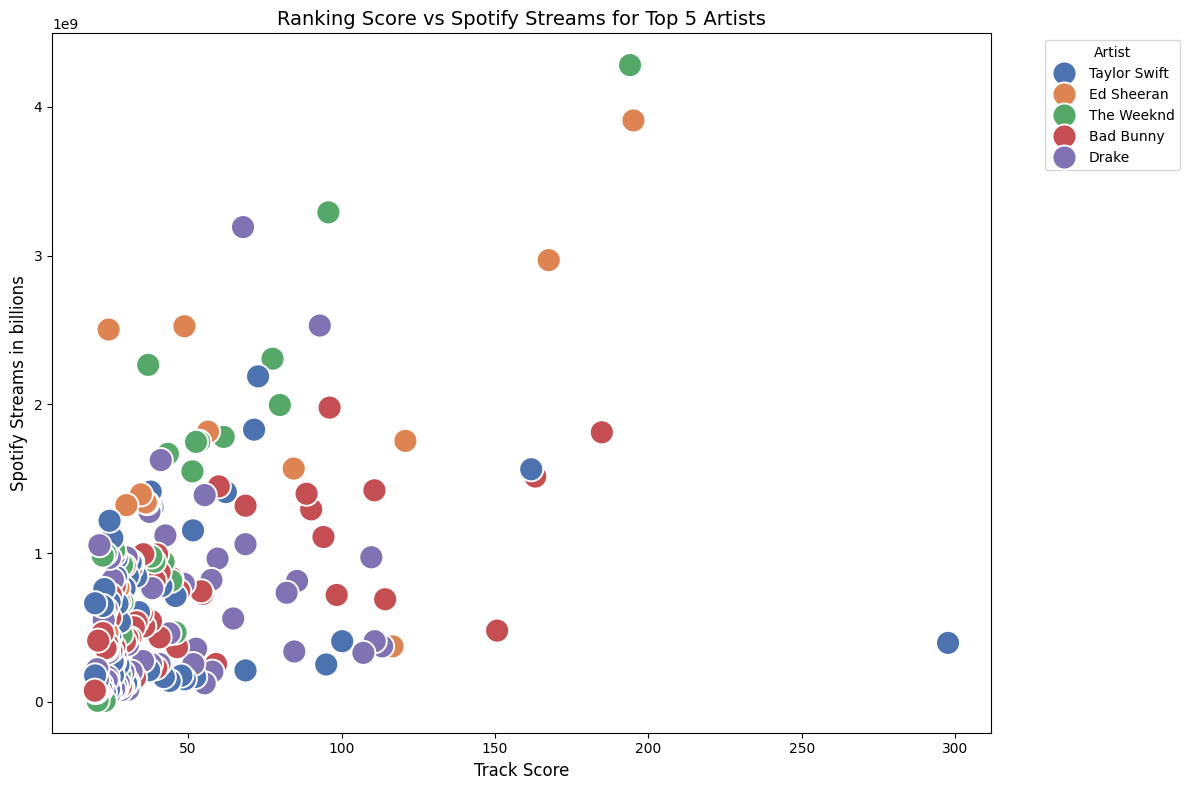

In [62]:
# Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Bad Bunny', 'The Weeknd', 'Drake', 'Taylor Swift', 'Ed Sheeran']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist',  # Group points by Artist
    palette='deep',
    s=300  # Set marker size
)

# Set the title and axis labels
plt.title('Ranking Score vs Spotify Streams for Top 5 Artists', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams in billions', fontsize=12)

# Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

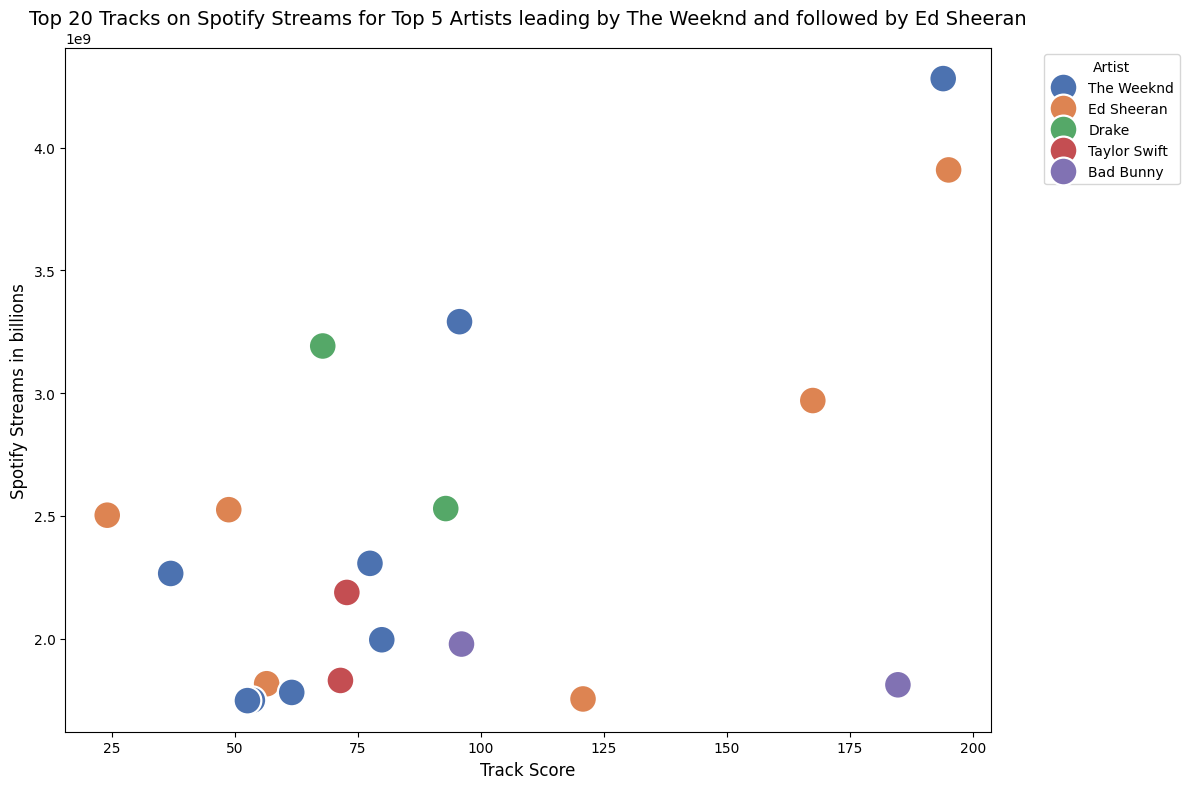

In [49]:
# Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Bad Bunny', 'The Weeknd', 'Drake', 'Taylor Swift', 'Ed Sheeran']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 100 tracks based on Spotify Streams
df_top_100 = df_top_5.nlargest(20, 'Spotify Streams')

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_100, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist',  # Group points by Artist
    palette='deep',
    s=400  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('Top 20 Tracks on Spotify Streams for Top 5 Artists leading by The Weeknd and followed by Ed Sheeran', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams in billions', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_10140\1461640374.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


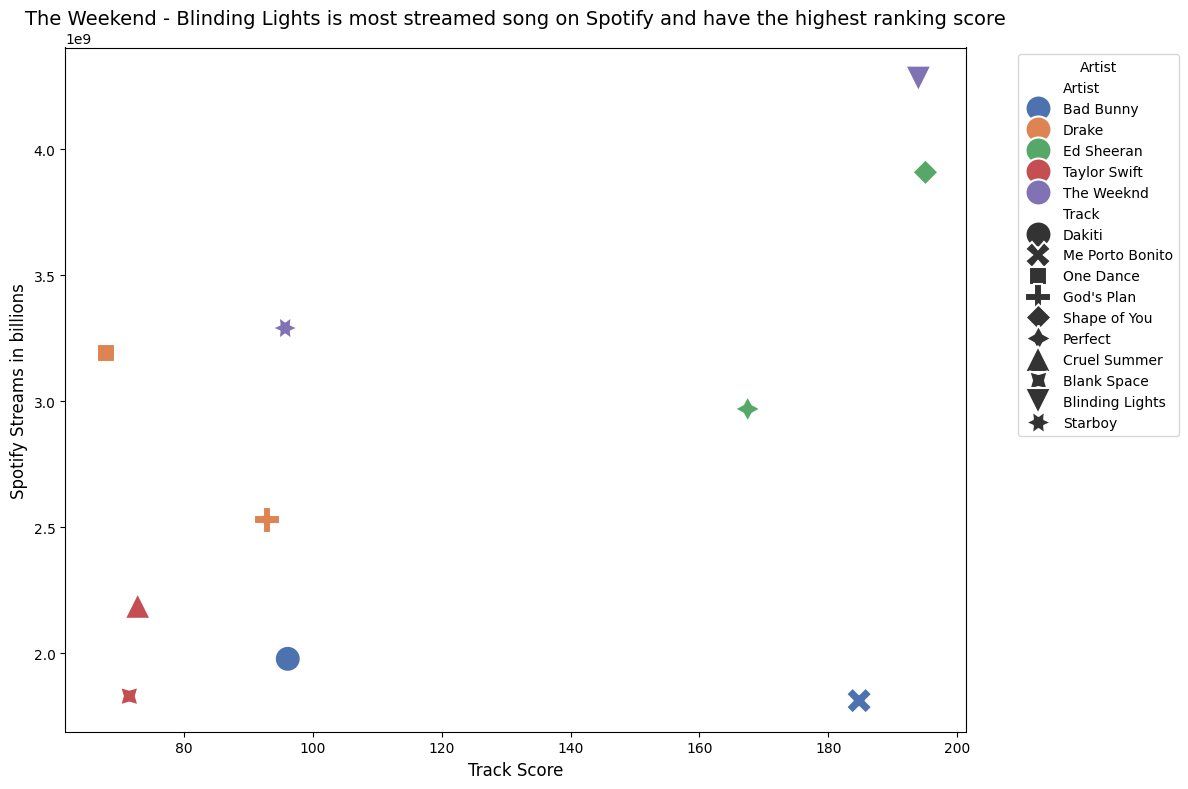

In [63]:
#Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Bad Bunny', 'The Weeknd', 'Drake', 'Taylor Swift', 'Ed Sheeran']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=350  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('The Weekend - Blinding Lights is most streamed song on Spotify and have the highest ranking score', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams in billions', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
# Step 1: Group the data by Artist and calculate total Spotify Streams
artist_performance = data_cleaned.groupby('Artist')['YouTube Likes'].sum().reset_index()

# Step 2: Sort the artists by total Spotify Streams in descending order
top_10_artists = artist_performance.sort_values(by='YouTube Likes', ascending=False).head(10)

# Step 3: Display the top 10 performing artists
print(top_10_artists)

               Artist  YouTube Likes
125               BTS    305024884.0
121         BLACKPINK    245809472.0
90      Ariana Grande    176612541.0
134         Bad Bunny    160220151.0
382        Ed Sheeran    150507111.0
652     Justin Bieber    144967003.0
1243     Taylor Swift    142729227.0
165     Billie Eilish    132617790.0
1271       The Weeknd    126088863.0
548   Imagine Dragons    123534880.0


C:\Users\Karina\AppData\Local\Temp\ipykernel_10140\3945846696.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'YouTube Likes'))


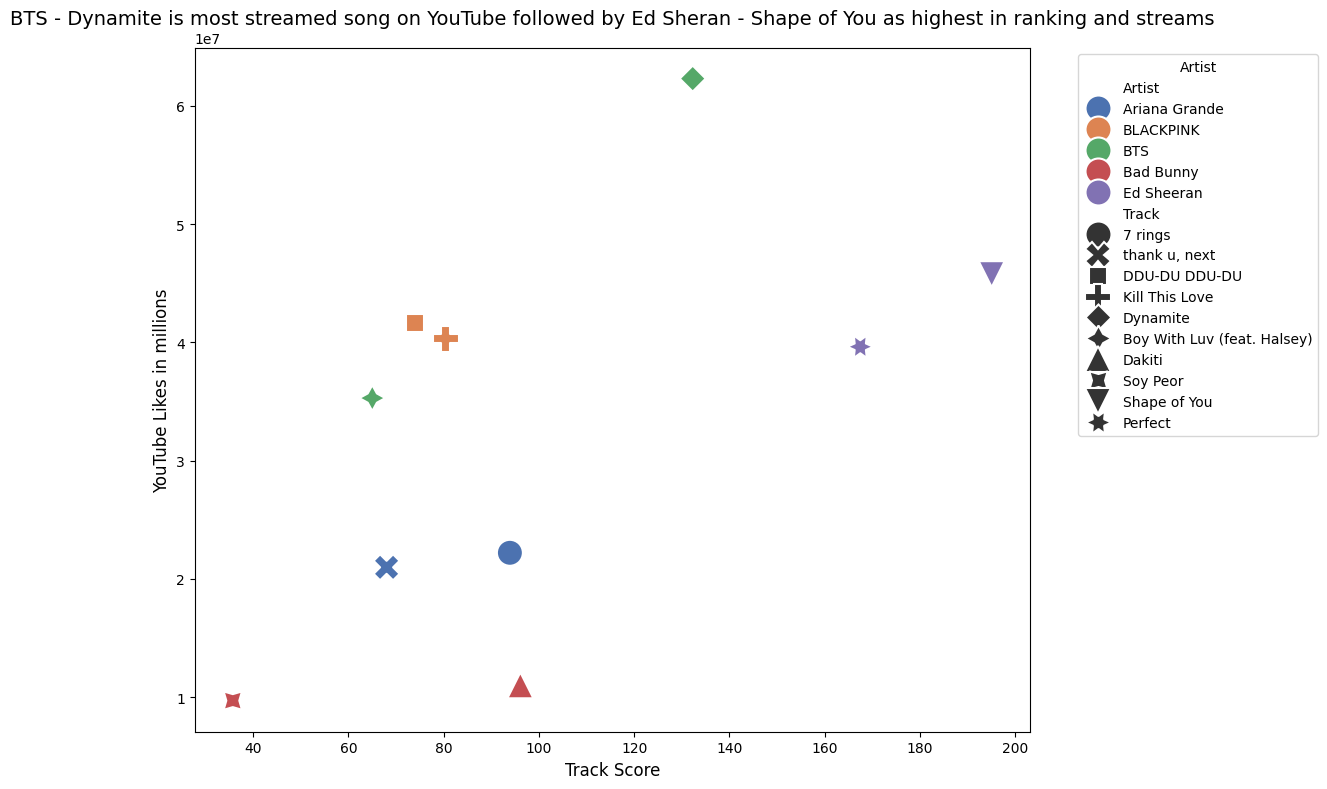

In [65]:
#Ranking Score vs Youtube Likes
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['BTS', 'BLACKPINK', 'Ariana Grande', 'Ed Sheeran', 'Bad Bunny']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'YouTube Likes'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='Track Score', 
    y='YouTube Likes', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=350  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('BTS - Dynamite is most streamed song on YouTube followed by Ed Sheran - Shape of You as highest in ranking and streams', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('YouTube Likes in millions', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_10140\1417247654.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


Text(0, 0.5, 'Spotify Streams in billions')

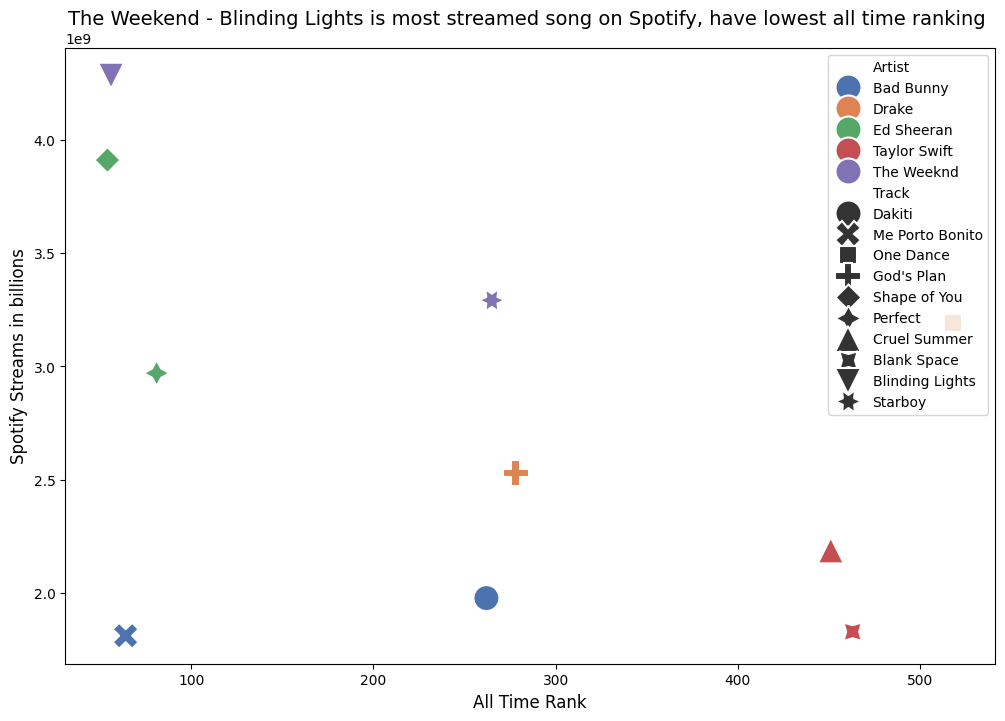

In [67]:
#All Time Rank vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Bad Bunny', 'The Weeknd', 'Drake', 'Taylor Swift', 'Ed Sheeran']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='All Time Rank', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=350  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('The Weekend - Blinding Lights is most streamed song on Spotify, have lowest all time ranking ', fontsize=14)
plt.xlabel('All Time Rank', fontsize=12)
plt.ylabel('Spotify Streams in billions', fontsize=12)

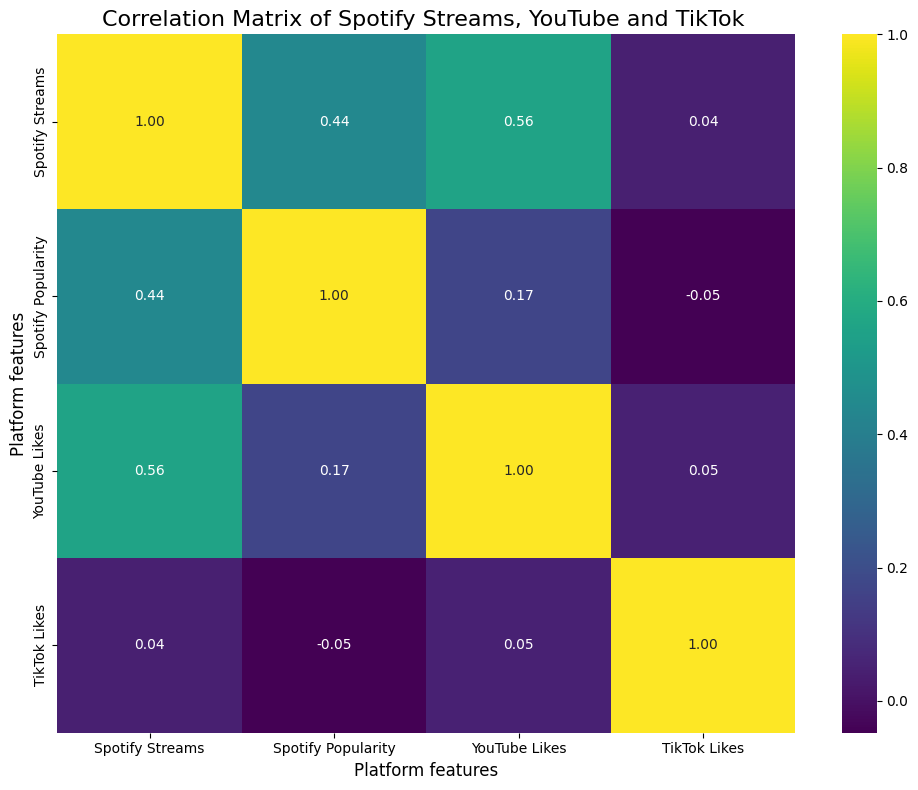

In [68]:
numeric_df = spotify_fields_keep.select_dtypes(include=[np.number])

# Remove specific columns from the DataFrame
columns_to_exclude = ['All Time Rank', 'Track Score', 'Explicit Track']
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')  # Use errors='ignore' to avoid issues if columns are missing


# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', cbar=True, xticklabels=corr.columns, yticklabels=corr.columns)

# Set plot title and axis labels
plt.title('Correlation Matrix of Spotify Streams, YouTube and TikTok ', fontsize=16)
plt.xlabel('Platform features', fontsize=12)
plt.ylabel('Platform features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

                                                  Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                           Lovin On Me   
...                                                 ...   
3384  ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...   
3385                                  For the Last Time   
3386                                   Dil Meri Na Sune   
3387                              Grace (feat. 42 Dugg)   
3388                                Nashe Si Chadh Gayi   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Ar

C:\Users\Karina\AppData\Local\Temp\ipykernel_10140\2064898324.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cleaned, x='Season', y='Track Score', palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])


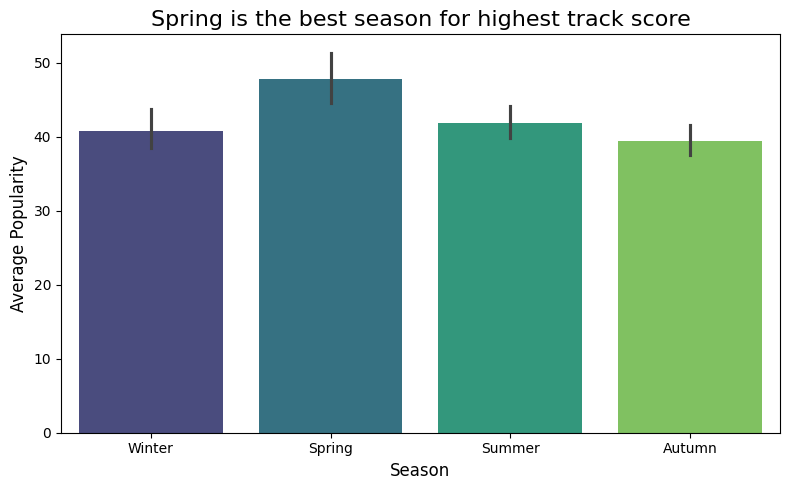

In [69]:

data_cleaned['Release Date'] = pd.to_datetime(data_cleaned['Release Date'], format='%d/%m/%Y')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new column for season
#Individual seasons can be retrieved 
# from the dataset by calling the get_season() function, which returns an instance of a Season object.
data_cleaned['Season'] = data_cleaned['Release Date'].dt.month.map(get_season)

# Display the DataFrame
print(data_cleaned)

# Example Visualization: Average popularity by season
plt.figure(figsize=(8, 5))
sns.barplot(data=data_cleaned, x='Season', y='Track Score', palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Spring is the best season for highest track score', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.tight_layout()
plt.show()